<h1>Импорт библиотек

In [8]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [27]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test_sum_prod():
    test_cases = [
        {
            "X": [np.array([[1, 2], [3, 4]])],
            "V": [np.array([[1], [2]])],
            "expected": np.array([[5], [11]])
        },
        {
            "X": [np.array([[1, 0], [0, 1]]), np.array([[2, 0], [0, 2]])],
            "V": [np.array([[1], [1]]), np.array([[2], [2]])],
            "expected": np.array([[5], [5]])
        }
    ]

    for i, case in enumerate(test_cases, 1):
        result = sum_prod(case["X"], case["V"])
        expected = case["expected"]
        if np.array_equal(result, expected):
            print(f"   Тест {i}:Все тесты пройдены, пожалуйста, поставьте 5 😅! Введено: '{test_cases}', — результат: {result.ravel()}")
        else:
            print(f"  Тест {i}: FAILED ❌ — вход: X={case['X']}, V={case['V']}")
            print(f"  Что-то пошло не так, только не бейте, пожалуйста 🥺 Ожидалось: {expected.ravel()}, Получено: {result.ravel()}")

test_sum_prod()


   Тест 1:Все тесты пройдены, пожалуйста, поставьте 5 😅! Введено: '[{'X': [array([[1, 2],
       [3, 4]])], 'V': [array([[1],
       [2]])], 'expected': array([[ 5],
       [11]])}, {'X': [array([[1, 0],
       [0, 1]]), array([[2, 0],
       [0, 2]])], 'V': [array([[1],
       [1]]), array([[2],
       [2]])], 'expected': array([[5],
       [5]])}]', — результат: [ 5 11]
   Тест 2:Все тесты пройдены, пожалуйста, поставьте 5 😅! Введено: '[{'X': [array([[1, 2],
       [3, 4]])], 'V': [array([[1],
       [2]])], 'expected': array([[ 5],
       [11]])}, {'X': [array([[1, 0],
       [0, 1]]), array([[2, 0],
       [0, 2]])], 'V': [array([[1],
       [1]]), array([[2],
       [2]])], 'expected': array([[5],
       [5]])}]', — результат: [5 5]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [31]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    test_cases = [
        {
            "M": np.array([[0.2, 0.6], [0.8, 0.1]]),
            "threshold": 0.5,
            "expected": np.array([[0, 1], [1, 0]])
        }
    ]
    for i, case in enumerate(test_cases, 1):
        result = binarize(case["M"], case["threshold"])
        if np.array_equal(result, case["expected"]):
            print(f"Тест {i}:Все тесты пройдены, пожалуйста, поставьте 5 😅! Введено: '{test_cases}', — результат: {result}")
        else:
            print(f"Что-то пошло не так, только не бейте, пожалуйста 🥺 Ожидалось: {expected}, Получено: {result}")
test_binarize()

Тест 1:Все тесты пройдены, пожалуйста, поставьте 5 😅! Введено: '[{'M': array([[0.2, 0.6],
       [0.8, 0.1]]), 'threshold': 0.5, 'expected': array([[0, 1],
       [1, 0]])}]', — результат: [[0 1]
 [1 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [34]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, i]) for i in range(mat.shape[1])]

def test_unique_rows_and_columns():
    mat = np.array([[1, 2, 2], [3, 3, 4]])
    expected_rows = [np.array([1, 2]), np.array([3, 4])]
    expected_cols = [np.array([1, 3]), np.array([2, 3]), np.array([2, 4])]

    rows_passed = all(np.array_equal(r, e) for r, e in zip(unique_rows(mat), expected_rows))
    cols_passed = all(np.array_equal(c, e) for c, e in zip(unique_columns(mat), expected_cols))

    print("Test rows:", "Все тесты пройдены, пожалуйста, поставьте 5 😅!" if rows_passed else "Что-то пошло не так, только не бейте, пожалуйста 🥺")
    print("Test cols:", "Все тесты пройдены, пожалуйста, поставьте 5 😅!" if cols_passed else "Что-то пошло не так, только не бейте, пожалуйста 🥺")
test_unique_rows_and_columns()

Test rows: Все тесты пройдены, пожалуйста, поставьте 5 😅!
Test cols: Все тесты пройдены, пожалуйста, поставьте 5 😅!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Средние по строкам: [ 0.78932956 -0.50721622 -0.04245925]
Дисперсии по строкам: [0.76866669 1.20643131 0.41390558]
Средние по столбцам: [-0.43015068  1.00360297 -0.38344052  0.12952703]
Дисперсии по столбцам: [2.40884046 0.48651565 0.07956091 0.03051832]


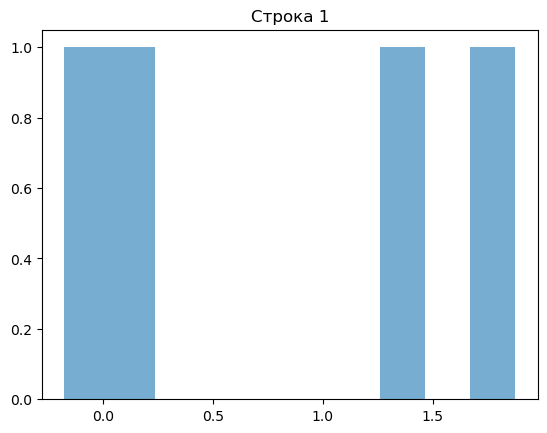

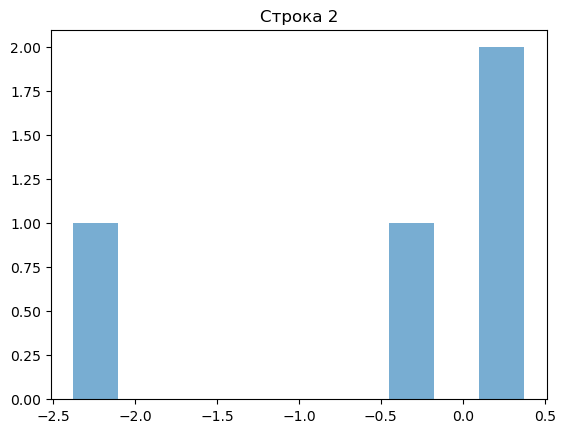

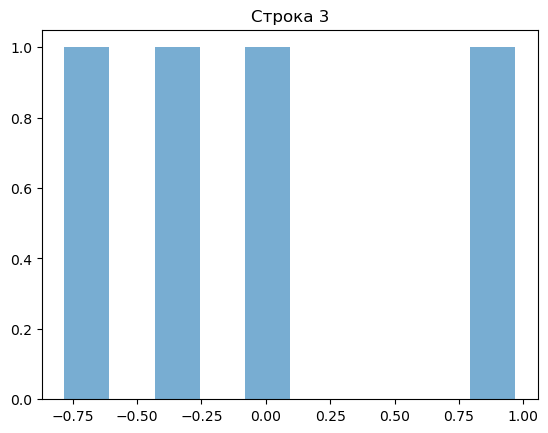

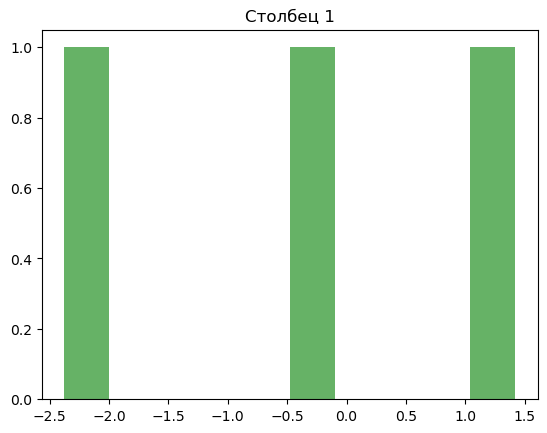

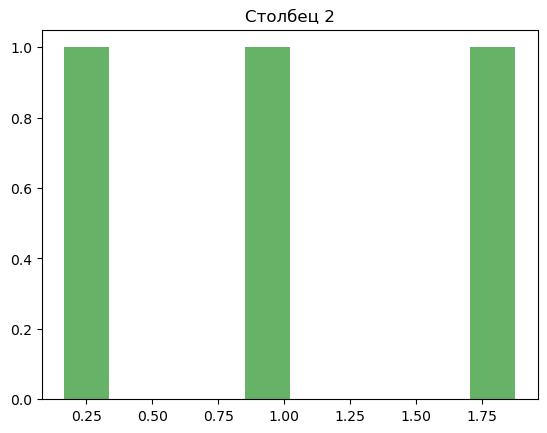

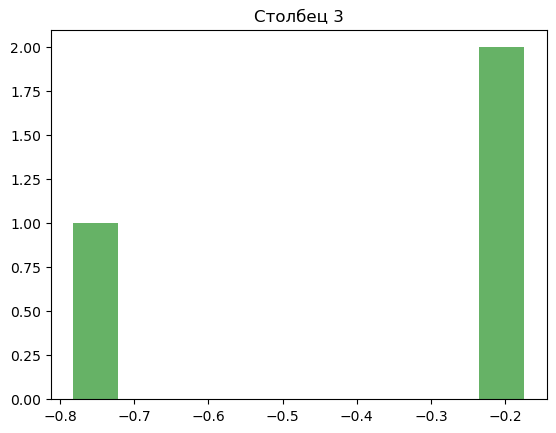

Все тесты пройдены, пожалуйста, поставьте 5 😅!


In [41]:
def analyze_distribution(rows, cols, mean=0, std=1):
    data = np.random.normal(loc=mean, scale=std, size=(rows, cols))
    print("Средние по строкам:", np.mean(data, axis=1))
    print("Дисперсии по строкам:", np.var(data, axis=1))
    print("Средние по столбцам:", np.mean(data, axis=0))
    print("Дисперсии по столбцам:", np.var(data, axis=0))

    for i in range(min(3, rows)):
        plt.hist(data[i], bins=10, alpha=0.6)
        plt.title(f'Строка {i + 1}')
        plt.show()

    for j in range(min(3, cols)):
        plt.hist(data[:, j], bins=10, alpha=0.6, color='green')
        plt.title(f'Столбец {j + 1}')
        plt.show()

    return data

def test_distribution_analysis():
    matrix = analyze_distribution(3, 4)
    assert matrix.shape == (3, 4)
    print("Все тесты пройдены, пожалуйста, поставьте 5 😅!")

test_distribution_analysis()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [40]:
def chess(rows, cols, val1, val2):
    out = np.full((rows, cols), val2, dtype=int)
    out[::2, ::2] = val1
    out[1::2, 1::2] = val1
    return out

def test_chess():
    assert np.array_equal(chess(2, 2, 1, 0), np.array([[1, 0], [0, 1]]))
    assert chess(0, 0, 1, 0).size == 0
    assert np.array_equal(
        chess(2, 5, 7, 3),
        np.array([[7, 3, 7, 3, 7], [3, 7, 3, 7, 3]])
    )
    print("Все тесты пройдены, пожалуйста, поставьте 5 😅!")

test_chess()

Все тесты пройдены, пожалуйста, поставьте 5 😅!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

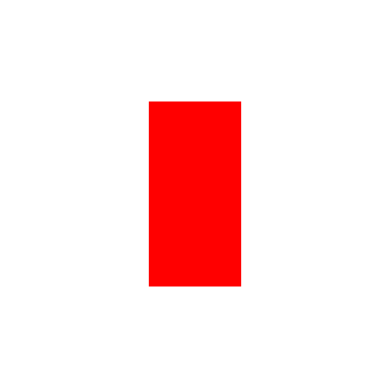

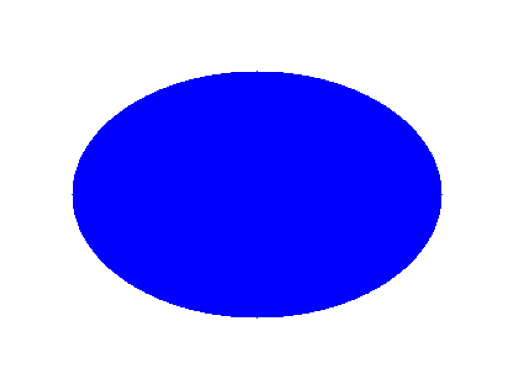

In [42]:
def draw_box(width, height, img_h, img_w, color_fg, color_bg):
    canvas = np.full((img_h, img_w, 3), color_bg, dtype=np.uint8)
    x0 = (img_w - width) // 2
    y0 = (img_h - height) // 2
    canvas[y0:y0 + height, x0:x0 + width] = color_fg
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

def draw_oval(half_w, half_h, img_h, img_w, color_fg, color_bg):
    canvas = np.full((img_h, img_w, 3), color_bg, dtype=np.uint8)
    y, x = np.ogrid[:img_h, :img_w]
    cx, cy = img_w // 2, img_h // 2
    mask = ((x - cx) ** 2) / (half_w ** 2) + ((y - cy) ** 2) / (half_h ** 2) <= 1
    canvas[mask] = color_fg
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

draw_box(100, 200, 400, 400, (255, 0, 0), (255, 255, 255))
draw_oval(150, 100, 300, 400, (0, 0, 255), (255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [43]:
def analyze_series(series, window=10):
    avg = np.mean(series)
    var = np.var(series)
    std = np.std(series)

    print(f"Среднее: {avg:.3f}, Дисперсия: {var:.3f}, СКО: {std:.3f}")

    maxima = np.where((series[1:-1] > series[:-2]) & (series[1:-1] > series[2:]))[0] + 1
    minima = np.where((series[1:-1] < series[:-2]) & (series[1:-1] < series[2:]))[0] + 1

    print("Локальные максимумы:", series[maxima])
    print("Локальные минимумы:", series[minima])

    moving_avg = np.convolve(series, np.ones(window) / window, mode='valid')
    print("Скользящее среднее:", moving_avg)

    return maxima, minima, moving_avg


ts = np.random.rand(50)
analyze_series(ts, window=10)

Среднее: 0.483, Дисперсия: 0.082, СКО: 0.286
Локальные максимумы: [0.98499129 0.87104088 0.624102   0.71356197 0.909844   0.89565428
 0.80314774 0.4581826  0.66559793 0.95566139 0.98696006 0.98720479
 0.72008012 0.8299882 ]
Локальные минимумы: [0.13978153 0.20879007 0.11479027 0.49764093 0.37029531 0.61935861
 0.04916845 0.2119134  0.29126827 0.24691956 0.02534655 0.09581837
 0.47050047 0.00883123]
Скользящее среднее: [0.48046122 0.50379116 0.41677105 0.46833182 0.5174453  0.52971643
 0.56561632 0.51554176 0.49355216 0.56223858 0.60223418 0.60175985
 0.67059559 0.60997351 0.58443558 0.57767567 0.50788261 0.53715627
 0.55165348 0.49121488 0.51473722 0.47749332 0.49587455 0.51312238
 0.47381175 0.43334222 0.43610733 0.43010066 0.46226135 0.44271636
 0.36971647 0.39064093 0.34987299 0.39182681 0.45732719 0.50184259
 0.56088495 0.5311071  0.44127452 0.43257581 0.4454852 ]


(array([ 1,  6, 10, 13, 15, 18, 21, 23, 27, 29, 31, 37, 43, 45],
       dtype=int64),
 array([ 2,  8, 11, 14, 16, 20, 22, 25, 28, 30, 34, 38, 44, 48],
       dtype=int64),
 array([0.48046122, 0.50379116, 0.41677105, 0.46833182, 0.5174453 ,
        0.52971643, 0.56561632, 0.51554176, 0.49355216, 0.56223858,
        0.60223418, 0.60175985, 0.67059559, 0.60997351, 0.58443558,
        0.57767567, 0.50788261, 0.53715627, 0.55165348, 0.49121488,
        0.51473722, 0.47749332, 0.49587455, 0.51312238, 0.47381175,
        0.43334222, 0.43610733, 0.43010066, 0.46226135, 0.44271636,
        0.36971647, 0.39064093, 0.34987299, 0.39182681, 0.45732719,
        0.50184259, 0.56088495, 0.5311071 , 0.44127452, 0.43257581,
        0.4454852 ]))

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [48]:
def one_hot(vec):
    vec = np.array(vec)
    n_classes = np.max(vec) + 1
    return np.eye(n_classes)[vec]

print( one_hot([0, 2, 3, 0]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
